# <center> A Movie Franchise Analysis of...

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMQNN9B5TFJIOKWkGrte6WcP7CBIPl-NPHDw&usqp=CAU)


The Harry Potter franchise is incredibly popular even decades after the first book realease. I basically grew up with the wizarding world and remains excited to talk about the magical stories and characters even now as a full grown adult.

So when Maven Analytics released a database challenge with Harry Potter theme, I cant wait to dive into the data. This notebook is my humble attempt to gain some insights into some of the most frequently discussed topics among the fan base. The topics I discussed here includes:
   
#### 1. Adaptation of book chapters
    
A key challenge for movie adaptation of books is **how to tell the intricate story and convey emotions within the limited movie runtime**, without the luxury of having paragraphs and paragraphs explaining everything
With this data we explore **which movies condense the most book chapters within 1 hour of runtime and which are the top 2 and bottom 2 most densed movie chapter**. We also try to draw a correlation between the revenue and the number of chapters per 1 hour of runtime. I also addin my personal judgement of the story telling of the overall movie and specific chapters listed to see if the densed content truly affect the quality.
    
#### 2. Character arc and Character development

Besides the golden trio, Luna Lovegood and Neville Longbottom are the two Dumbledore Army members that are beloved by many. In this section we explore the number of dialogues and the number of words these two characters have over the course of the series. For comparison, we also add in the same statistics for Ginny Weasley, another DA member and a prominent side character to see the contrast.

    
#### 3. Factors that determine the movies budget and their revenue

The budget could be influenced by many different factors. Within the constraints of the collected data, we try to analyze budget level based on:
- The number of dialogues (less dialogue, more actions and actions are more costly to make)
- The number of places appear for the first time( more places more set needs to be built, but if the set is reused from the previous movies, no additional budget needed)
- The movie length (the longer it is, the more shots needed to be taken)
We also add in the revenue for each movie to see if there is any correlation between the revenue and the above factors.

## Downloading the Dataset

**Explaination** - this data set contains of 5 tables and a dictionary explaining what data fields we will find in each of the table. To answer the 4 questions above we need to access 2 to 4 tables in the database 

In [1]:
from urllib.request import urlretrieve

In [2]:
Characters = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Characters.csv'
urlretrieve(Characters, 'Characters.csv')

('Characters.csv', <http.client.HTTPMessage at 0x7fdd780e1580>)

In [3]:
Chapters = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Chapters.csv'
urlretrieve(Chapters, 'Chapters.csv')

('Chapters.csv', <http.client.HTTPMessage at 0x7fdd780e1790>)

In [4]:
Data_Dictionary = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Data_Dictionary.csv'
urlretrieve(Data_Dictionary, 'Data_Dictionary.csv')

('Data_Dictionary.csv', <http.client.HTTPMessage at 0x7fdd780e1bb0>)

In [5]:
Dialogue = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Dialogue.csv'
urlretrieve(Dialogue, 'Dialogue.csv')

('Dialogue.csv', <http.client.HTTPMessage at 0x7fdd780e1dc0>)

In [6]:
Movies = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Movies.csv'
urlretrieve(Movies, 'Movies.csv')

('Movies.csv', <http.client.HTTPMessage at 0x7fdd780720a0>)

In [7]:
Places = 'https://raw.githubusercontent.com/nmduong232/harrypotter/main/Places.csv'
urlretrieve(Places, 'Places.csv')

('Places.csv', <http.client.HTTPMessage at 0x7fdd78072340>)

In [8]:
import pandas as pd

In [9]:
Data_Dictionary_df = pd.read_csv('Data_Dictionary.csv', encoding='cp1252')

In [10]:
Chapters_df = pd.read_csv('Chapters.csv', encoding='cp1252')

In [11]:
Characters_df = pd.read_csv('Characters.csv', encoding='cp1252')

In [12]:
Dialogue_df = pd.read_csv('Dialogue.csv', encoding='Latin1')

In [13]:
Movies_df = pd.read_csv('Movies.csv', encoding='cp1252')

In [14]:
Places_df = pd.read_csv('Places.csv', encoding='cp1252')

## Data Preparation and Cleaning

In this section we will: 
- Explore the basics of the tables in the database (rows & columns, ranges of values)
- Check for missing data, incorrect and invalid data
- Merging multiple tables to create dataframe specifically for each section and create additional columns

#### Step 1: Go through the info() function for each table  

In [15]:
Chapters_df.info()
Characters_df.info()
Dialogue_df.info()
Movies_df.info()
Places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Chapter ID     234 non-null    int64 
 1   Chapter Name   234 non-null    object
 2   Movie ID       234 non-null    int64 
 3   Movie Chapter  234 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 10

#### Step 2: Look at the top 10 items for each table to get a glimse of what the data would look like 

In [16]:
Places_df.head(10)

,Place ID,Place Name,Place Category
0,1,Flourish & Blotts,Diagon Alley
1,2,Gringotts Wizarding Bank,Diagon Alley
2,3,Knockturn Alley,Diagon Alley
3,4,Ollivanders,Diagon Alley
4,5,The Leaky Cauldron,Diagon Alley
5,6,Weasleys' Wizard Wheezes,Diagon Alley
6,7,12 Grimmauld Place,Dwellings
7,8,4 Privet Drive,Dwellings
8,9,Godric's Hollow,Dwellings
9,10,Hut-on-the-Rock,Dwellings


In [17]:
Chapters_df.head(10)

,Chapter ID,Chapter Name,Movie ID,Movie Chapter
0,1,Doorstep Delivery,1,1
1,2,The Vanishing Glass,1,2
2,3,Letters from No One,1,3
3,4,Keeper of the Keys,1,4
4,5,Diagon Alley,1,5
5,6,Gringotts,1,6
6,7,Ollivanders,1,7
7,8,The Boy Who Lived,1,8
8,9,Platform 9&¾,1,9
9,10,Ron and Hermione,1,10


In [18]:
Dialogue_df.head(10)

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
5,6,1,8,7,Do you think it wise to trust Hagrid with some...
6,7,1,8,4,"Ah, Professor, I would trust Hagrid with my life."
7,8,1,8,5,"Professor Dumbledore, Sir. Professor McGonagall."
8,9,1,8,4,"No problems, I trust, Hagrid?"
9,10,1,8,5,"No, sir. Little tyke fell asleep just as we we..."


In [19]:
Movies_df.head(10)

,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"$130,000,000","$796,700,000"
3,4,Harry Potter and the Goblet of Fire,2005,157,"$150,000,000","$896,400,000"
4,5,Harry Potter and the Order of the Phoenix,2007,138,"$150,000,000","$942,000,000"
5,6,Harry Potter and the Half-Blood Prince,2009,153,"$250,000,000","$943,200,000"
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"$200,000,000","$976,900,000"
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"


In [20]:
Characters_df.head(10)

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
5,6,Severus Snape,Human,Male,Slytherin,Doe,NaN,NaN
6,7,Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring
7,8,Horace Slughorn,Human,Male,Slytherin,NaN,Cedar,Dragon Heartstring
8,9,Voldemort,Human,Male,Slytherin,NaN,Yew,Phoenix Feather
9,10,Neville Longbottom,Human,Male,Gryffindor,NaN,Cherry,Unicorn Hair


#### Step 3: We now merge the table, perform some queries to explore the database and add new column that would serve to answer our questions

##### 3.1: Adaptation of book chapters

In [21]:
# For the review of book adaptation, we need Movies and Chapters tables

Book_adaptation_df_raw = pd.merge(Chapters_df,Movies_df, how ='left', left_on = 'Movie ID', right_on = 'ï»¿Movie ID' )

In [22]:
Book_adaptation_df_raw

,Chapter ID,Chapter Name,Movie ID,Movie Chapter,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,The Vanishing Glass,1,2,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
2,3,Letters from No One,1,3,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
3,4,Keeper of the Keys,1,4,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
4,5,Diagon Alley,1,5,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
...,...,...,...,...,...,...,...,...,...,...
229,230,Declare Yourself,8,22,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
230,231,Not Over,8,23,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
231,232,The Wand's Choice,8,24,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"
232,233,The Wizard's Choice,8,25,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"


In [23]:
# We now ty to see the all the Movie chapter in Movie ID = 1,

Book_adaptation_df_1st_movie = Book_adaptation_df_raw[Book_adaptation_df_raw['Movie ID'] == 1]

Book_adaptation_df_1st_movie

,Chapter ID,Chapter Name,Movie ID,Movie Chapter,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,The Vanishing Glass,1,2,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
2,3,Letters from No One,1,3,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
3,4,Keeper of the Keys,1,4,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
4,5,Diagon Alley,1,5,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
5,6,Gringotts,1,6,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
6,7,Ollivanders,1,7,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
7,8,The Boy Who Lived,1,8,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
8,9,Platform 9&¾,1,9,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
9,10,Ron and Hermione,1,10,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"


In [24]:
# Alternatively we can remove the dollar sign for the Movie df to perform later calculation
Movies_no_dollar_sign_df = Movies_df.copy()
Movies_no_dollar_sign_df['Budget'] = Movies_no_dollar_sign_df['Budget'].str.replace('$','')
Movies_no_dollar_sign_df['Box Office'] = Movies_no_dollar_sign_df['Box Office'].str.replace('$','')
Movies_no_dollar_sign_df

/tmp/ipykernel_175/3552589913.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Movies_no_dollar_sign_df['Budget'] = Movies_no_dollar_sign_df['Budget'].str.replace('$','')
/tmp/ipykernel_175/3552589913.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Movies_no_dollar_sign_df['Box Office'] = Movies_no_dollar_sign_df['Box Office'].str.replace('$','')


,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000"
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000"
3,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000"
4,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000"
5,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000"
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000"
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000"


In [25]:
# Lets see the number of chapters group by each movie

d = {'Chapter ID' : 'Number of chapters'}
Chapters_by_movie_df = Chapters_df.rename(columns = d).groupby('Movie ID')['Number of chapters'].count()
Chapters_by_movie_details_df = pd.merge(Chapters_by_movie_df, Movies_no_dollar_sign_df, how ='left', left_on = 'Movie ID', right_on = 'ï»¿Movie ID' )
Chapters_by_movie_details_df['Runtime_hours'] = Chapters_by_movie_details_df['Runtime'] / 60
Chapters_by_movie_details_df['Chapters_over_hour'] = Chapters_by_movie_details_df['Number of chapters'] / Chapters_by_movie_details_df['Runtime_hours']
Chapters_by_movie_details_df

,Number of chapters,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Runtime_hours,Chapters_over_hour
0,34,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",2.533333,13.421053
1,36,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000",2.683333,13.416149
2,33,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000",2.366667,13.943662
3,27,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000",2.616667,10.318471
4,27,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000",2.300000,11.739130
5,26,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000",2.550000,10.196078
6,25,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000",2.433333,10.273973
7,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",2.166667,12.000000


In [26]:
# Lets see the most 3 densed movie
Chapters_by_movie_details_df.sort_values('Chapters_over_hour', ascending = False)

,Number of chapters,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Runtime_hours,Chapters_over_hour
2,33,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000",2.366667,13.943662
0,34,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",2.533333,13.421053
1,36,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000",2.683333,13.416149
7,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",2.166667,12.000000
4,27,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000",2.300000,11.739130
3,27,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000",2.616667,10.318471
6,25,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000",2.433333,10.273973
5,26,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000",2.550000,10.196078


##### 3.2. Character arc and Character development

In [27]:
# First lets join all tables that we need into one big data frame.
# We will need the following tables: Dialogue, Characters, Chapters, Movies

Dialogue_byChapters_df = pd.merge(Dialogue_df,Chapters_df, how ='left', left_on = 'Chapter ID', right_on = 'Chapter ID')
Dialogue_byChapters_byCharacters_df = pd.merge(Dialogue_byChapters_df,Characters_df, how ='left', left_on = 'Character ID', right_on = 'Character ID')
Dialogue_byChapters_byCharacters_byMovies_df = pd.merge(Dialogue_byChapters_byCharacters_df,Movies_df, how = 'left', left_on = 'Movie ID', right_on = 'ï»¿Movie ID')

In [28]:
# Test out our new joined table using head 

Dialogue_byChapters_byCharacters_byMovies_df.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter,Character Name,Species,...,House,Patronus,Wand (Wood),Wand (Core),ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Gryffindor,Phoenix,Elder,Thestral Tail Hair,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1,Minerva McGonagall,Human,...,Gryffindor,Cat,Fir,Dragon Heartstring,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Gryffindor,Phoenix,Elder,Thestral Tail Hair,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1,Minerva McGonagall,Human,...,Gryffindor,Cat,Fir,Dragon Heartstring,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1,Albus Dumbledore,Human,...,Gryffindor,Phoenix,Elder,Thestral Tail Hair,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"


In [29]:
# Now we extract the columns we would be using, and create a proper name for this data frame

Selected_columns = ['Character Name', 'Dialogue', 'Movie ID', 'Movie Title', 'Runtime']

Characters_growth_df = Dialogue_byChapters_byCharacters_byMovies_df[Selected_columns].copy()

Characters_growth_df.head()

,Character Name,Dialogue,Movie ID,Movie Title,Runtime
0,Albus Dumbledore,I should have known that you would be here...P...,1,Harry Potter and the Philosopher's Stone,152
1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",1,Harry Potter and the Philosopher's Stone,152
2,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",1,Harry Potter and the Philosopher's Stone,152
3,Minerva McGonagall,And the boy?,1,Harry Potter and the Philosopher's Stone,152
4,Albus Dumbledore,Hagrid is bringing him.,1,Harry Potter and the Philosopher's Stone,152


In [30]:
# Lets add a new column that counts the number of words per each dialogue spoken 
Characters_growth_df['Number of words'] = Characters_growth_df.Dialogue.apply(lambda x: len(str(x).split(' ')))
Characters_growth_df.head()

,Character Name,Dialogue,Movie ID,Movie Title,Runtime,Number of words
0,Albus Dumbledore,I should have known that you would be here...P...,1,Harry Potter and the Philosopher's Stone,152,10
1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",1,Harry Potter and the Philosopher's Stone,152,9
2,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",1,Harry Potter and the Philosopher's Stone,152,9
3,Minerva McGonagall,And the boy?,1,Harry Potter and the Philosopher's Stone,152,3
4,Albus Dumbledore,Hagrid is bringing him.,1,Harry Potter and the Philosopher's Stone,152,4


In [31]:
Characters_growth_df['Character Name'].unique()

array(['Albus Dumbledore', 'Minerva McGonagall', 'Rubeus Hagrid',
       'Petunia Dursley', 'Dudley Dursley', 'Vernon Dursley',
       'Harry Potter', 'Student', 'Man', 'Tom', 'Goblin',
       'Quirinus Quirrell', 'Boy', 'Merpeople', 'Griphook',
       'Garrick Ollivander', 'Old man', 'Molly Weasley', 'George Weasley',
       'Fred Weasley', 'Ginny Weasley', 'Ron Weasley', 'Woman',
       'Hermione Granger', 'Neville Longbottom', 'Draco Malfoy',
       'Sorting Hat', 'Seamus Finnigan', 'Percy Weasley',
       'Nearly Headless Nick', 'Bloody Baron', 'Girl', 'Shrunken head',
       'The Fat Lady', 'Severus Snape', 'Rolanda Hooch', 'Class',
       'Students', 'Boy 2', 'Argus Filch', 'All', 'Oliver Wood',
       'Filius Flitwick', 'Lee Jordan', 'Gryffindors', 'Marcus Flint',
       'Crowd', 'Man in a painting', 'Firenze', 'Voldemort', 'Dobby',
       'Arthur Weasley', 'Other', 'Snake', 'Gilderoy Lockhart',
       'Lucius Malfoy', 'Waiter', 'Whomping Willow', 'Pomona Sprout',
       'Colin 

In [32]:
# Lets select only the dialogues from the 3 characters that we are interested in: Neville, Luna, Ginny

Characters_growth_DA_members_df = Characters_growth_df[(Characters_growth_df['Character Name'].str.contains('Luna')) | (Characters_growth_df['Character Name'].str.contains('Neville')) | (Characters_growth_df['Character Name'].str.contains('Ginny'))].copy()

Characters_growth_DA_members_df

,Character Name,Dialogue,Movie ID,Movie Title,Runtime,Number of words
195,Ginny Weasley,Good luck.,1,Harry Potter and the Philosopher's Stone,152,2
235,Neville Longbottom,Trevor! Sorry.,1,Harry Potter and the Philosopher's Stone,152,3
288,Neville Longbottom,"Seamus, that picture's moving!",1,Harry Potter and the Philosopher's Stone,152,4
317,Neville Longbottom,"The only problem is, I can't remember what I'v...",1,Harry Potter and the Philosopher's Stone,152,10
329,Neville Longbottom,Oh...,1,Harry Potter and the Philosopher's Stone,152,1
...,...,...,...,...,...,...
7385,Neville Longbottom,Neville Longbottom.,8,Harry Potter and the Deathly Hallows Part 2,130,2
7389,Neville Longbottom,I'd like to say something.,8,Harry Potter and the Deathly Hallows Part 2,130,5
7391,Neville Longbottom,It doesn't matter that Harry is gone. A troubl...,8,Harry Potter and the Deathly Hallows Part 2,130,14
7392,Neville Longbottom,This isn't over.,8,Harry Potter and the Deathly Hallows Part 2,130,3


In [33]:
Side_characters_dialoge = pd.pivot_table(
   Characters_growth_DA_members_df,
   index=['Movie ID','Character Name'],
   aggfunc={'Number of words': sum, 'Dialogue': len}
).rename(columns={'Dialogue': 'Number of dialogue'})

##### 3.3. Factors that determine the movies budget and their revenue

In [34]:
# Lets join another table that would help to explore the movies budget factors and their revenue
# This table will consist of the following tables: Dialogue, Chapters, Movies, Places

Dialogue_bychapters_df = pd.merge(Dialogue_df, Chapters_df, how ='left', left_on = 'Chapter ID', right_on = 'Chapter ID')
Dialogue_bymovies_df = pd.merge(Dialogue_bychapters_df, Movies_no_dollar_sign_df, how = 'left', left_on = 'Movie ID', right_on = 'ï»¿Movie ID')
Dialogue_bymovies_bypaces = pd.merge(Dialogue_bymovies_df, Places_df, how = 'left', left_on = 'Place ID', right_on = 'Place ID')

Dialogue_bymovies_bypaces


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Place Name,Place Category
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",4 Privet Drive,Dwellings
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",4 Privet Drive,Dwellings
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",4 Privet Drive,Dwellings
3,4,1,8,7,And the boy?,Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",4 Privet Drive,Dwellings
4,5,1,8,4,Hagrid is bringing him.,Doorstep Delivery,1,1,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",4 Privet Drive,Dwellings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,Nineteen Years Later,8,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",Platform Nine and Three-Quarters,Other Magical Locations
7440,7441,234,71,84,Really?,Nineteen Years Later,8,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",Platform Nine and Three-Quarters,Other Magical Locations
7441,7442,234,71,1,Really.,Nineteen Years Later,8,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",Platform Nine and Three-Quarters,Other Magical Locations
7442,7443,234,71,1,Ready?,Nineteen Years Later,8,26,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",Platform Nine and Three-Quarters,Other Magical Locations


In [35]:
Dialogue_bymovies_bypaces.columns

Index(['Dialogue ID', 'Chapter ID', 'Place ID', 'Character ID', 'Dialogue',
       'Chapter Name', 'Movie ID', 'Movie Chapter', 'ï»¿Movie ID',
       'Movie Title', 'Release Year', 'Runtime', 'Budget', 'Box Office',
       'Place Name', 'Place Category'],
      dtype='object')

In [36]:
# Lets get the following metrics for each movie:
# Item 1. Revnue and Budget
# Item 2. The movie length
# Item 3. The number of places apprearing for the first time in each movies
# Item 4. The number of words spoken (less dialogue, more actions and actions are more costly to make)

# For Item 1, 2 we already have it in the Dialogue_bymovies_bypaces data frame, 
# for item 3 we need to first get the first movie that the places appear, this can be done by getting the min movie ID of each places.
# This is done by sort_values of the movies group by place ID, place name to get the top 1 value

Place_first_movie_df = Dialogue_bymovies_bypaces[['Place ID','Place Name','Movie ID']].copy().sort_values('Movie ID', ascending = True).groupby('Place ID', as_index=False,sort=False).head(1)
Place_first_movie_df


,Place ID,Place Name,Movie ID
0,8,4 Privet Drive,1
584,65,Unknown Classroom,1
598,44,Library,1
556,39,Griffindor Common Room,1
573,54,Restricted Section,1
...,...,...,...
6704,13,Malfoy Manor,7
6726,15,Shell Cottage,7
7207,24,Boathouse,8
7116,53,Ravenclaw Tower,8


In [37]:
# Now lets get the number of places that appeared first time in each movies

New_places_per_movies = Place_first_movie_df.groupby('Movie ID', as_index=False, sort=False)['Place ID'].count().rename(columns = {'Place ID' : 'New Places'})
New_places_per_movies

,Movie ID,New Places
0,1,27
1,2,11
2,3,8
3,4,7
4,5,6
5,6,6
6,7,6
7,8,3


In [38]:
# Moving onto item 4, lets get the number of words per movie

Dialogue_bymovies_bypaces['Dialogue word count'] = Dialogue_bymovies_bypaces['Dialogue'].apply(lambda x : len(str(x).split(' ')))
Words_per_movies = Dialogue_bymovies_bypaces.groupby('Movie ID', as_index=False, sort=False)['Dialogue word count'].sum()
Words_per_movies

,Movie ID,Dialogue word count
0,1,9845
1,2,10729
2,3,9684
3,4,8216
4,5,9553
5,6,12245
6,7,10928
7,8,6564


In [39]:
type(Movies_no_dollar_sign_df)

pandas.core.frame.DataFrame

In [40]:
# For the final steps we join back to the Movies table (processed removed the dollar sign) to get a table we can perform analysis

%who DataFrame # check which dataframe is available
Movies_no_of_words = pd.merge(Movies_no_dollar_sign_df,Words_per_movies, how='left', left_on='ï»¿Movie ID', right_on='Movie ID')
Movies_no_of_words_new_places = pd.merge(Movies_no_of_words,New_places_per_movies, how = 'left', left_on = 'ï»¿Movie ID', right_on = 'Movie ID')
Movies_no_of_words_new_places['Runtime in hours'] = Movies_no_of_words_new_places['Runtime'].apply(lambda x : x/60)
Movies_no_of_words_new_places

Book_adaptation_df_1st_movie	 Book_adaptation_df_raw	 Chapters_by_movie_details_df	 Chapters_df	 Characters_df	 Characters_growth_DA_members_df	 Characters_growth_df	 Data_Dictionary_df	 Dialogue_byChapters_byCharacters_byMovies_df	 
Dialogue_byChapters_byCharacters_df	 Dialogue_byChapters_df	 Dialogue_bychapters_df	 Dialogue_bymovies_bypaces	 Dialogue_bymovies_df	 Dialogue_df	 Movies_df	 Movies_no_dollar_sign_df	 New_places_per_movies	 
Place_first_movie_df	 Places_df	 Side_characters_dialoge	 Words_per_movies	 


,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Movie ID_x,Dialogue word count,Movie ID_y,New Places,Runtime in hours
0,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",1,9845,1,27,2.533333
1,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000",2,10729,2,11,2.683333
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000",3,9684,3,8,2.366667
3,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000",4,8216,4,7,2.616667
4,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000",5,9553,5,6,2.300000
5,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000",6,12245,6,6,2.550000
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000",7,10928,7,6,2.433333
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",8,6564,8,3,2.166667


# Exploratory data analysis

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Query data from the table to answer some basic questions
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

We do this for each raw table data. For the data in the joint table, we would visualize this in the Questions section.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [42]:
%who DataFrame

Book_adaptation_df_1st_movie	 Book_adaptation_df_raw	 Chapters_by_movie_details_df	 Chapters_df	 Characters_df	 Characters_growth_DA_members_df	 Characters_growth_df	 Data_Dictionary_df	 Dialogue_byChapters_byCharacters_byMovies_df	 
Dialogue_byChapters_byCharacters_df	 Dialogue_byChapters_df	 Dialogue_bychapters_df	 Dialogue_bymovies_bypaces	 Dialogue_bymovies_df	 Dialogue_df	 Movies_df	 Movies_no_dollar_sign_df	 Movies_no_of_words	 
Movies_no_of_words_new_places	 New_places_per_movies	 Place_first_movie_df	 Places_df	 Side_characters_dialoge	 Words_per_movies	 


In [43]:
Movies_no_dollar_sign_df

,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000"
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000"
3,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000"
4,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000"
5,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000"
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000"
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000"


Lets first explore the box office revenue and budget for each movie using barchat and line chart

In [44]:
Movies_no_dollar_sign_df['Budget in million'] = Movies_no_dollar_sign_df['Budget'].apply(lambda x: int(str(x)[0:3]))
Movies_no_dollar_sign_df['Box Office in million'] = Movies_no_dollar_sign_df['Box Office'].apply(lambda x: round(int(str(x).replace(',',''))/1e6,0))
Movies_no_dollar_sign_df['Profit in million'] = Movies_no_dollar_sign_df['Box Office in million'] - Movies_no_dollar_sign_df['Budget in million'] 
Movies_no_dollar_sign_df

,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office,Budget in million,Box Office in million,Profit in million
0,1,Harry Potter and the Philosopher's Stone,2001,152,"125,000,000","1,002,000,000",125,1002.0,877.0
1,2,Harry Potter and the Chamber of Secrets,2002,161,"100,000,000","880,300,000",100,880.0,780.0
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"130,000,000","796,700,000",130,797.0,667.0
3,4,Harry Potter and the Goblet of Fire,2005,157,"150,000,000","896,400,000",150,896.0,746.0
4,5,Harry Potter and the Order of the Phoenix,2007,138,"150,000,000","942,000,000",150,942.0,792.0
5,6,Harry Potter and the Half-Blood Prince,2009,153,"250,000,000","943,200,000",250,943.0,693.0
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,"200,000,000","976,900,000",200,977.0,777.0
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"250,000,000","1,342,000,000",250,1342.0,1092.0


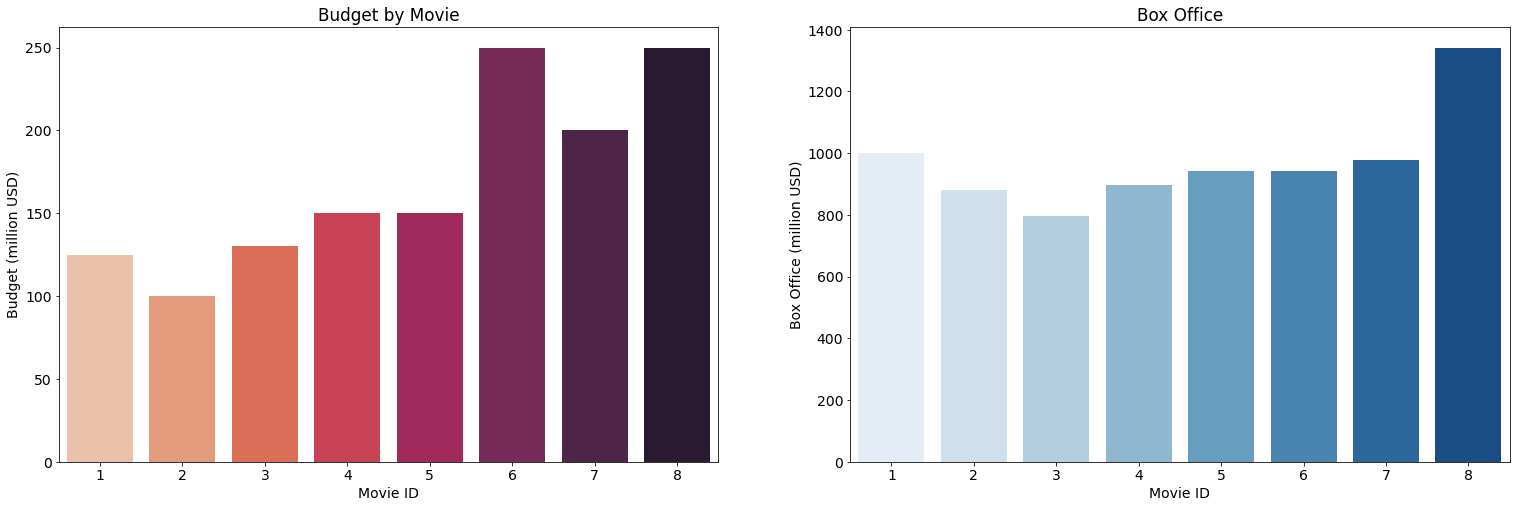

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(26, 8))

sns.barplot(x='ï»¿Movie ID',y='Budget in million', data=Movies_no_dollar_sign_df, palette = 'rocket_r', ax=axes[0])
axes[0].set_xlabel('Movie ID')
axes[0].set_ylabel('Budget (million USD)')
axes[0].set_title('Budget by Movie')

sns.barplot(x='ï»¿Movie ID',y='Box Office in million', data=Movies_no_dollar_sign_df, palette = 'Blues', ax=axes[1])
axes[1].set_xlabel('Movie ID')
axes[1].set_ylabel('Box Office (million USD)')
axes[1].set_title('Box Office')

plt.show()


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

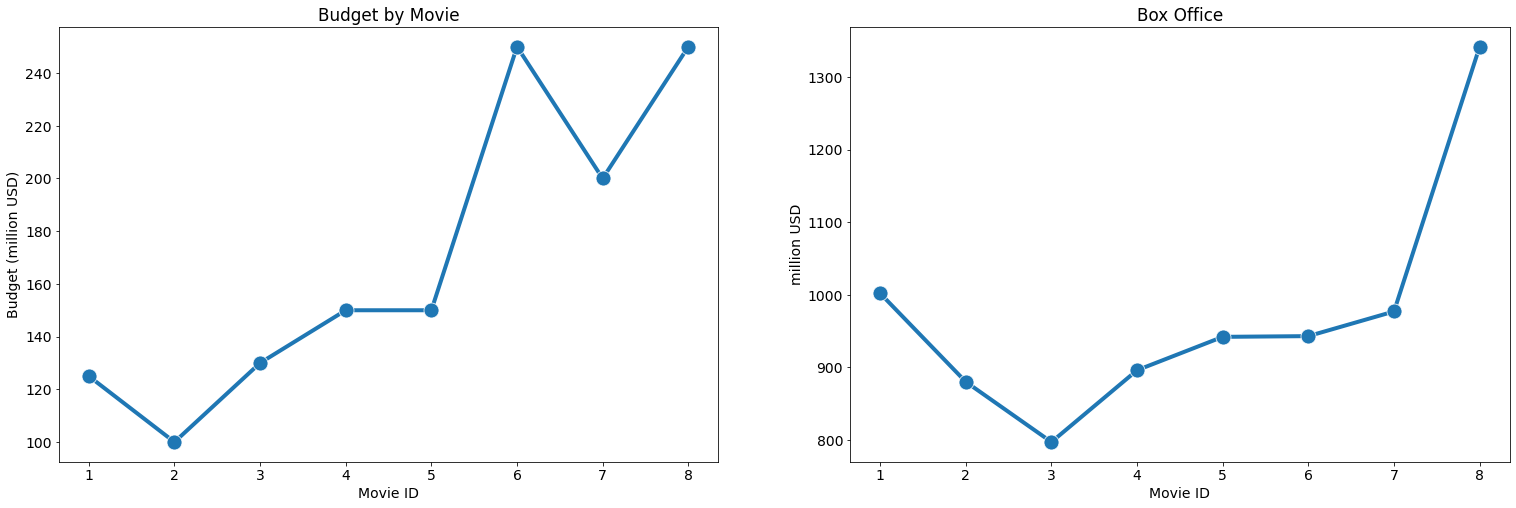

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(26, 8))

sns.lineplot(x='ï»¿Movie ID',y='Budget in million', data=Movies_no_dollar_sign_df, marker = 'o', markersize = 15, ax=axes[0],lw = 4)
axes[0].set_xlabel('Movie ID')
axes[0].set_ylabel('Budget (million USD)')
axes[0].set_title('Budget by Movie')

sns.lineplot(x='ï»¿Movie ID',y='Box Office in million', data=Movies_no_dollar_sign_df, marker = 'o', markersize = 15, ax=axes[1],lw = 4)
axes[1].set_xlabel('Movie ID')
axes[1].set_ylabel('million USD')
axes[1].set_title('Box Office')
plt.show()


In [47]:
Profit_analysis = pd.melt(Movies_no_dollar_sign_df[['ï»¿Movie ID','Budget in million', 'Box Office in million',
       'Profit in million']].copy() , id_vars='ï»¿Movie ID', var_name='Financial', value_name='Amount in million USD')

<Figure size 2520x1296 with 0 Axes>

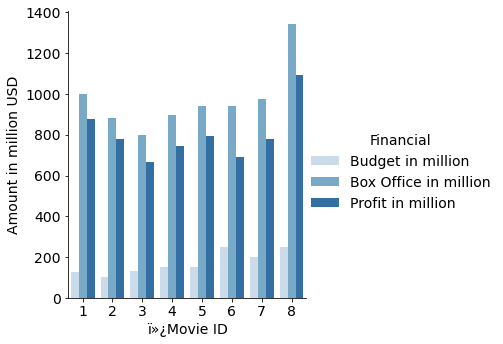

In [48]:
plt.figure(figsize = (35,18))
sns.catplot(x='ï»¿Movie ID', y='Amount in million USD', hue='Financial', data = Profit_analysis, kind='bar', palette = 'Blues')

In [49]:
Characters_df.head()

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN


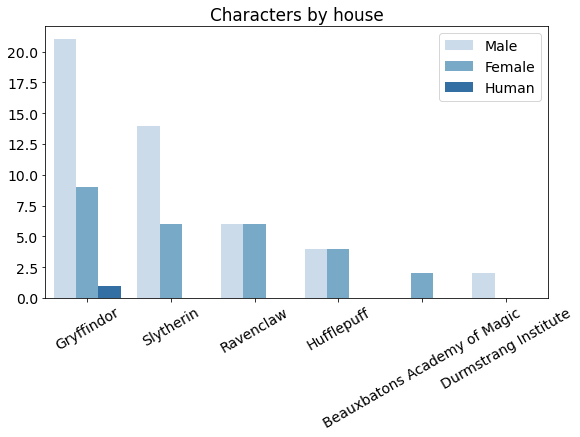

In [50]:
# Lets look at the distribution of characters by House

g2 = sns.countplot(x='House',data=Characters_df,hue='Gender', palette = 'Blues')
g2.set(title='Characters by house')
g2.set(xlabel=None)
g2.set(ylabel=None)
plt.xticks(rotation=30)
plt.legend(loc='upper right')

plt.show()


In [51]:
Dialogue_bychapters_count = pd.pivot_table(
    Dialogue_bymovies_bypaces[['Dialogue ID','Chapter ID', 'Movie ID']].copy(),
    index = ['Chapter ID', 'Movie ID'],
    aggfunc = {'Dialogue ID' : len}).rename(columns = {'Dialogue ID' : 'Number of dialogue'})

Dialogue_bychapters_count

,,Number of dialogue
Chapter ID,Movie ID,
1,1,16
2,1,33
3,1,32
4,1,38
5,1,23
...,...,...
230,8,12
231,8,21
232,8,8


Text(0, 0.5, '')

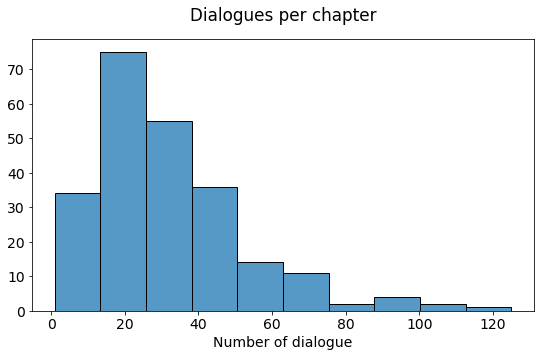

In [52]:
fig, axes = plt.subplots()

sns.histplot(Dialogue_bychapters_count['Number of dialogue'], kde=False, bins=10, palette = 'rocket_r')
axes.set_title('Dialogues per chapter',  y=0, pad=290)
axes.set_ylabel(None)

Let us save and upload our work to Jovian before continuing

In [53]:
import jovian

## Asking and Answering Questions

Now we finally attempt to answer the questions stated at the beginning of the project

![](https://ca-times.brightspotcdn.com/dims4/default/6e59d5c/2147483647/strip/true/crop/2048x1288+0+0/resize/840x528!/format/webp/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F81%2F13%2F245e1442213d29a8cad5307769ba%2Fla-1554139706-tljcqf7s32-snap-image)

#### Q1 - 2:  Adaptation of book chapters

With this data we explore **which movies condense the most book chapters within 1 hour of runtime and which are the top 2 and bottom 2 most densed movie chapter**. We also try to draw a correlation between the revenue and the number of chapters per 1 hour of runtime. I also addin my personal judgement of the story telling of the overall movie and specific chapters listed to see if the densed content truly affect the quality.

Text(0.5, 0, 'Movie adaptation')

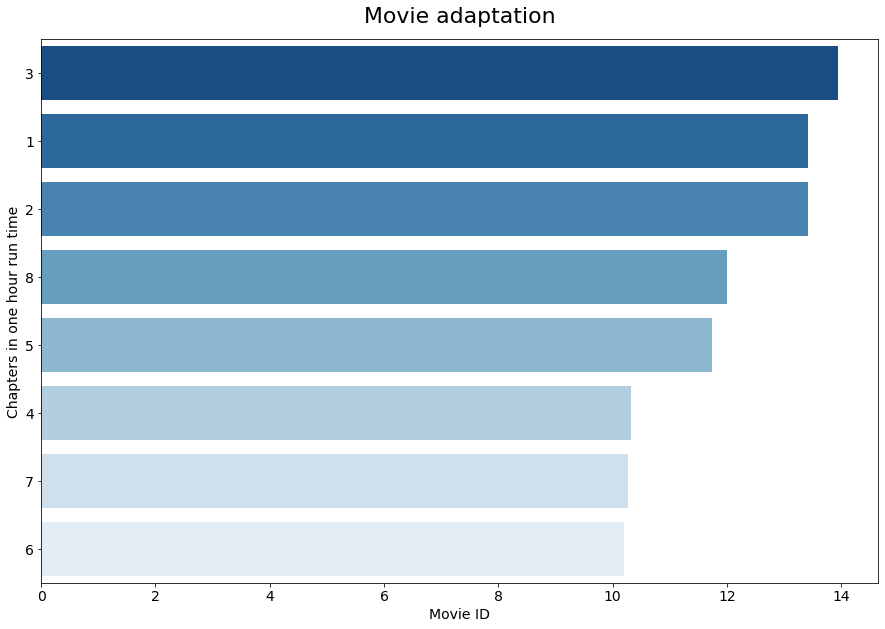

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

sns.barplot(x='Chapters_over_hour',y='ï»¿Movie ID', data=Chapters_by_movie_details_df, palette = 'Blues_r', orient = 'h'
           , order=Chapters_by_movie_details_df.sort_values('Chapters_over_hour',ascending = False)['ï»¿Movie ID'])
axes.set_xlabel('Movie ID')
axes.set_ylabel('Chapters in one hour run time')
axes.set_title('Movie adaptation', y=0, pad=560, fontsize = '22')

In the above chart, we can see that the most dense movies are actually the first 3 movies, while the longer book like book number 4 and 7 with a lot of content actually have less chapters per 1 hour of runtime. In this case, chapters per runtime might not be the best metrics to track how dense and how much content is crammed in each movie due to the difference in the length of the movies.  

In [55]:
Chapters_by_movie_details_df['Box Office'] = Chapters_by_movie_details_df['Box Office'].str.replace(',','').astype(int)
Chapters_by_movie_details_df['Budget'] = Chapters_by_movie_details_df['Budget'].str.replace(',','').astype(int)
Chapters_by_movie_details_df['Chapters_over_hour'] = Chapters_by_movie_details_df['Chapters_over_hour'].astype(int)
Chapters_by_movie_details_df['Runtime_hours'] = Chapters_by_movie_details_df['Runtime_hours'].astype(int)

Text(0.5, 0, 'Movie adaptation')

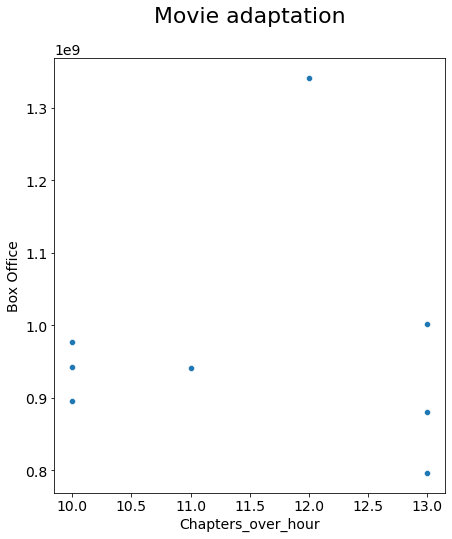

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(7, 8))

sns.scatterplot(x='Chapters_over_hour',y='Box Office',data=Chapters_by_movie_details_df)
axes.set_xlabel('Chapters_over_hour')
axes.set_ylabel('Box Office')
axes.set_title('Movie adaptation', y=0, pad=470, fontsize = '22')

Same with comparing the movies in the bar chart, a scatter plot also shows no correlation whatsoever between the chapters per hour of run time and the box office. The data did not show correlation between the variables.

![](https://media.harrypotterfanzone.com/dumbledores-army-in-the-ministry-of-magic.jpg)

#### Q3: Character arc and Character development

Besides the golden trio, Luna Lovegood and Neville Longbottom are the two Dumbledore Army members that are beloved by many. In this section we explore the number of dialogues and the number of words these two characters have over the course of the series. For comparison, we also add in the same statistics for Ginny Weasley, another DA member and a prominent side character to see the contrast.

Text(0.5, 1.0, 'Number of words')

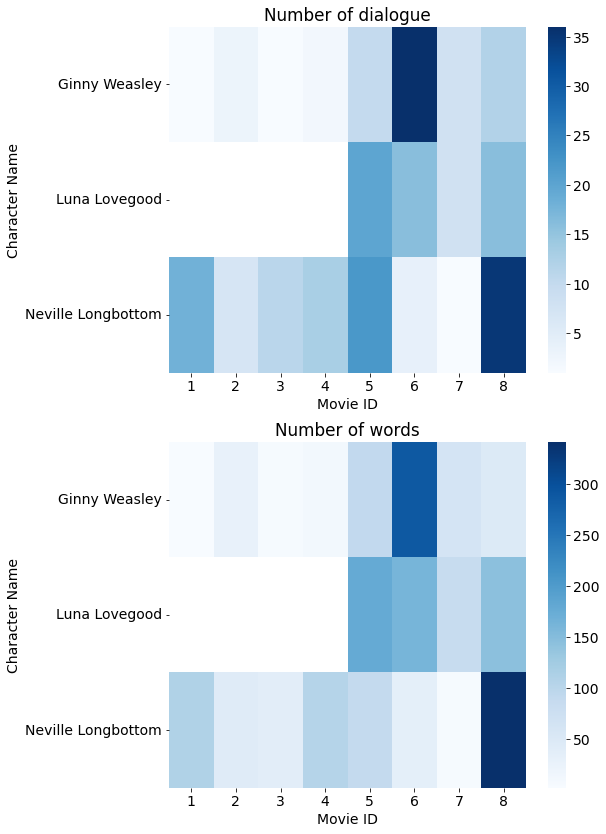

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(8, 14))

sns.heatmap(Side_characters_dialoge.pivot_table(values = 'Number of dialogue', index='Character Name',columns='Movie ID'),cmap = 'Blues', linecolor='white', ax = axes[0])
axes[0].set_title('Number of dialogue')
sns.heatmap(Side_characters_dialoge.pivot_table(values = 'Number of words', index='Character Name',columns='Movie ID'),cmap = 'Blues', linecolor='white', ax = axes[1])
axes[1].set_title('Number of words')

From the above chart, we can clearly see a significant rise in appearance for Ginny in the sixth movie and Neville in the last movie. This is the moment their characters really plays significant role (Neville leading the Dumbledore Army after Harry left Hogwarts and Ginny with her love story with Harry).

Interestingly,there were no consistent increase in the presence of these characters movie on movie. Instead, we have a sudden spike here and there for these characters. My guess is JK Rowling did not have a clear path in mind for a vertical improvement for the characters but rather she put them where the story is heading. Luna actually has a more consistent appearance than both Ginny and Neville. May be this could be due to her innocence characters that make her a great point of view to tell the story from. 

If we look at the difference in number of words and number of dialogue, we continue to see a stark difference between Luna and the rest. Neville is made out to be one of the most important sub characters due to his impressive heroic rise in the last book, but from the data shown here, Luna is actually the character that gets more focus from the filmmaker. 

![](https://i.pinimg.com/originals/02/46/33/024633911aaf6ea4a119df42ac2cf50d.jpg)

#### Q4-5: Factors that determine the movies budget and their revenue

The budget could be influenced by many different factors. Within the constraints of the collected data, we try to analyze budget level based on:
- The number of dialogues (less dialogue, more actions and actions are more costly to make)
- The number of places appear for the first time( more places more set needs to be built, but if the set is reused from the previous movies, no additional budget needed)
- The movie length (the longer it is, the more shots needed to be taken)
We also add in the revenue for each movie to see if there is any correlation between the revenue and the above factors.

In [58]:
# First we need to convert all columns to int to perform smooth charting

Movies_no_of_words_new_places['Budget'] = Movies_no_of_words_new_places['Budget'].str.replace(',','').astype(int)
Movies_no_of_words_new_places['Box Office'] = Movies_no_of_words_new_places['Box Office'].str.replace(',','').astype(int)
Movies_no_of_words_new_places['Runtime in hours'] = Movies_no_of_words_new_places['Runtime in hours'].astype(int)

Text(0.5, 0, 'Budget correlation with places and dialogue')

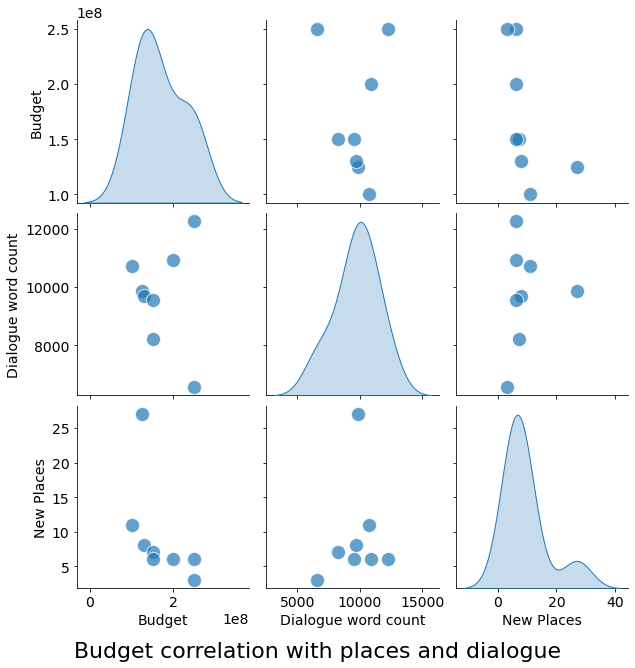

In [59]:
sns.pairplot(Movies_no_of_words_new_places[['Budget','Dialogue word count','New Places']], diag_kind = 'kde',
             plot_kws = {'alpha': 0.7, 's': 200}, height = 3)

plt.suptitle('Budget correlation with places and dialogue', y=0, fontsize = '22')

Our hypothesis did not turn out to be true as the budget did not show any correlation with the dialogue word count and number of new places per movie. Further data needs to be gathered to answer such question.

Text(0.5, 0, 'Box office correlation with places and dialogue')

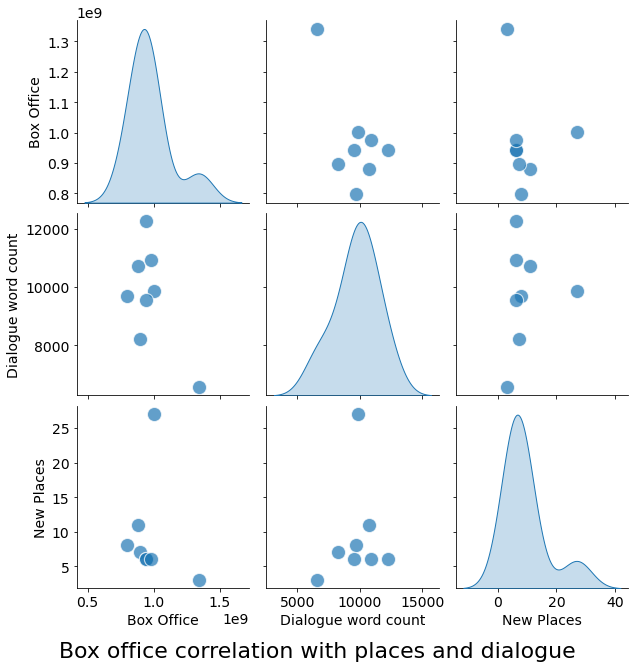

In [60]:
sns.pairplot(Movies_no_of_words_new_places[['Box Office','Dialogue word count','New Places']], diag_kind = 'kde',
             plot_kws = {'alpha': 0.7, 's': 200}, height = 3)

plt.suptitle('Box office correlation with places and dialogue', y=0, fontsize = '22')

Our hypothesis did not turn out to be true as the budget did not show any correlation with the dialogue word count and number of new places per movie. Further data needs to be gathered to answer such question.

## Inferences and Conclusion

Our analysis have successfully explore a lot about the HP movie series. In all of our 3 initial hypothesis, only 1 turns out a meaningful analysis (the role of the 3 side characters). For the other analysis, it turns out that more data would have to be acquired for us to have a meaningful insight.  

## Reference and Future work

The project was made possible by Stackoverflow, w3school and countless other tutorials and of course, Jovian lectures. Thank you for your incredible help.

Next I'm looking to dive into:
- Would Cup dataset
- Real world business dataset using Panda and Seaborn